In [1]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
import numpy as np
import pandas as pd
from pprint import pprint
from os import listdir
from os.path import isfile, join
from sklearn.model_selection import StratifiedKFold
from scipy import stats
import numpy as np
from sklearn import linear_model, svm
import re
from sklearn.pipeline import Pipeline
#s = "../braindata/data_1_mor_select_100.csv"
import os          
from sklearn import linear_model, svm
from sklearn.ensemble import ExtraTreesClassifier

from __future__ import print_function
import pickle
import os
import scipy.io
from scipy import stats

import pandas as pd
from numpy import *

import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd
import argparse
from sklearn.model_selection import GridSearchCV, cross_val_score,cross_val_predict,StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,roc_curve, auc,f1_score,confusion_matrix,roc_auc_score

os.getcwd()
os.chdir('../braindata')

###########################################################################################################
datafile="data_3_all"######################################################################################
datafile_csv=datafile + '.csv'
data_name=datafile
###########################################################################################################

dd =pd.read_csv(datafile_csv,header=0)
import csv

with open(datafile_csv, 'r') as f:
    d_reader = csv.DictReader(f)

    #get fieldnames from DictReader object and store in list
    headers = d_reader.fieldnames
data=np.array(dd)

#print(data.shape)
idx_IN_columns = np.append(np.array([3,4]),np.array(range(11,data.shape[1])))
X=data[:,idx_IN_columns]
X = stats.zscore(X)

###########################################################################################################
y=data[:,6]######################################################################################################
#5: ad-smi / 6:mci-smi / 7:ADONLYvsSMI / 8:ad-mci / 9:adonly-mci / 10:adonly - adwithsmallvv
name='MCIvsSMC'#####################################################################################################
###########################################################################################################

/Users/posnerlab/Library/Python/3.5/lib/python/site-packages/scipy/stats/stats.py:2247: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


********random seed:33994
10 2 5 16
Accuracy:0.7878787878787878,AUC:0.8888888888888888
Sensitivity:0.6666666666666666,Specificity:0.8888888888888888
9 3 3 18
Accuracy:0.8181818181818182,AUC:0.9087301587301586
Sensitivity:0.75,Specificity:0.8571428571428571
10 2 4 16
Accuracy:0.8125,AUC:0.8937499999999999
Sensitivity:0.7142857142857143,Specificity:0.8888888888888888
********random seed:31358
11 1 3 18
Accuracy:0.8787878787878788,AUC:0.9305555555555555
Sensitivity:0.7857142857142857,Specificity:0.9473684210526315
7 5 4 17
Accuracy:0.7272727272727273,AUC:0.8650793650793651
Sensitivity:0.6363636363636364,Specificity:0.7727272727272727
10 2 3 17
Accuracy:0.84375,AUC:0.9375
Sensitivity:0.7692307692307693,Specificity:0.8947368421052632
********random seed:27381
11 1 2 19
Accuracy:0.9090909090909091,AUC:0.9464285714285715
Sensitivity:0.8461538461538461,Specificity:0.95
9 3 4 17
Accuracy:0.7878787878787878,AUC:0.8630952380952381
Sensitivity:0.6923076923076923,Specificity:0.85
9 3 2 18
Accuracy:

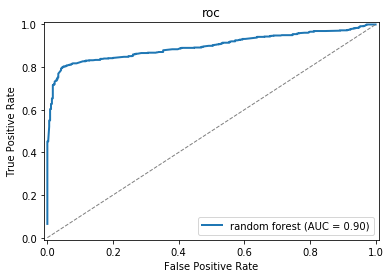

In [2]:
ind_num=np.isnan(y)
# print(ind_num.shape)


y_no_nan = y[~ind_num]

X_no_nan = X[~ind_num,:]

       # print(y.shape)

y=y_no_nan
X=X_no_nan
feature_num_all=[]
lr_all_feature=[]
svm_all_feature=[]
lr_fls_feature=[]
svm_fls_feature=[]
base_labels= []

#X=X.reshape(X.size,1)
#X=X.astype(np.float64,copy=False)
np.isnan(X).any()
#feature_num=features.shape[1]
X[np.isnan(X)] = np.median(X[~np.isnan(X)])

n_fold = 3

all_TP = []
all_TN = []
all_FP = []
all_FN = []

all_acc = []
all_sen = []
all_spec = []
all_auc = []

all_roc_label = []
all_roc_pred = []
all_roc_prob = []

rs_list=[33994,31358,27381,8642,7012,42023,44642,44002,30706,12571]
for rs in rs_list:
        print('********random seed:{}'.format(rs))

        inner_cv = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=rs)
        outer_cv = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=rs)

        scaler = StandardScaler()
        #scaler = RobustScaler()
        scaler.fit(X)
        X = scaler.transform(X)

        avg_acc = []
        avg_TP = []
        avg_TN = []
        avg_FP = []
        avg_FN = []
        avg_sen = []
        avg_spec = []
        avg_auc = []


        roc_label = []
        roc_pred = []
        roc_prob = []
        
        for train_index, test_index in outer_cv.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            # 'featureExtract__n_estimators': np.arange(10, 100, 10),
            
            #grid1######################################
            #params = {'randomforest__min_samples_leaf': np.arange(1, 51, 5),
            #          'randomforest__n_estimators': np.arange(10, 100, 10)}
            
            #grid2######################################
            #params = {'randomforest__min_samples_leaf': np.arange(1, 51, 1),
            #          'randomforest__n_estimators': np.arange(10, 500, 10)}
            
            #grid3######################################
            params = {'randomforest__min_samples_leaf': np.arange(1, 51, 5),
                      'randomforest__n_estimators': np.arange(10, 500, 10)}
            
            params_svm = [
                    {'randomforest__min_samples_leaf': np.arange(1, 51, 5),
                      'randomforest__n_estimators': np.arange(10, 100, 10)},
                    {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}                
            ]
            
            #pipe = Pipeline([
            #    ('featureExtract', SelectFromModel(ExtraTreesClassifier())),
            #    ('randomforest', RandomForestClassifier())
            #])
            
            pipe_rf = Pipeline([
                ('featureExtract', SelectFromModel(ExtraTreesClassifier())),
                ('randomforest', RandomForestClassifier())
            ])

            
            
            #clf = GridSearchCV(estimator=pipe, param_grid=params, cv=inner_cv, scoring='accuracy',n_jobs=8)
            clf = GridSearchCV(estimator=pipe_rf, param_grid=params, cv=inner_cv,scoring='accuracy', n_jobs=-1)
            clf.fit(X_train, y_train)

            fs = clf.best_estimator_.named_steps['featureExtract']
            mask = fs.get_support()
            y_pred = clf.predict(X_test)
            y_prob = clf.predict_proba(X_test)
          #  roc_pred = clf.predict_proba(X_test)

            acc = accuracy_score(y_test, y_pred)
            auc = roc_auc_score(y_test, y_prob[:, 1])

            roc_label = np.append(roc_label, y_test)
            roc_pred = np.append(roc_pred, y_pred)
            roc_prob = np.append(roc_prob, y_prob[:, 1])
            
            #confusion mat

            conf_mat = confusion_matrix(y_test, y_pred)

            TP = conf_mat[0][0]
            FP = conf_mat[0][1]
            FN = conf_mat[1][0]
            TN = conf_mat[1][1]
            
            print(TP, FP, FN, TN)
            sen = TP / (TP + FN)
            spec = TN / (TN + FP)
                
            # avg meausres
            avg_TP = np.append(avg_TP, TP)
            avg_TN = np.append(avg_TN, TN)
            avg_FP = np.append(avg_FP, FP)
            avg_FN = np.append(avg_FN, FN)

            avg_acc = np.append(avg_acc, acc)
            avg_sen = np.append(avg_sen, sen)
            avg_spec = np.append(avg_spec, spec)
            avg_auc = np.append(avg_auc, auc)
        
            print('Accuracy:{},AUC:{}'.format(acc, auc))
            print('Sensitivity:{},Specificity:{}'.format(sen, spec))
    
        # all measures
        all_TP = np.append(all_TP, avg_TP)
        all_TN = np.append(all_TN, avg_TN)
        all_FP = np.append(all_FP, avg_FP)
        all_FN = np.append(all_FN, avg_FN)

        all_acc = np.append(all_acc, avg_acc)
        all_sen = np.append(all_sen, avg_sen)
        all_spec = np.append(all_spec, avg_spec)
        all_auc = np.append(all_auc, avg_auc)
    
        all_roc_label = np.append(all_roc_label, roc_label)
        all_roc_pred = np.append(all_roc_pred, roc_pred)
        all_roc_prob = np.append(all_roc_prob, roc_prob)


print(all_sen)
import numpy as np, scipy.stats as st

#all_acc 
#all_sen 
#all_spec 



acc_CI=st.t.interval(0.95, len(all_acc)-1, loc=np.mean(all_acc), scale=st.sem(all_acc))
sen_CI=st.t.interval(0.95, len(all_sen)-1, loc=np.mean(all_sen), scale=st.sem(all_sen))
spec_CI=st.t.interval(0.95, len(all_spec)-1, loc=np.mean(all_spec), scale=st.sem(all_spec))
auc_CI=st.t.interval(0.95, len(all_auc)-1, loc=np.mean(all_auc), scale=st.sem(all_auc))

txt_name='../imgs2/' + name + '_' + data_name + '.txt'
print("RF_ACC={a}, 95%CI={l}-{u}".format(a=np.mean(all_acc), l=acc_CI[0],u=acc_CI[1]),file=open(txt_name, "a"))
print("RF_AUC={a}, 95%CI={l}-{u}".format(a=np.mean(all_auc), l=auc_CI[0],u=auc_CI[1]),file=open(txt_name, "a"))
print("RF_SENSITIVITY={a}, 95%CI={l}-{u}".format(a=np.mean(all_sen), l=sen_CI[0],u=sen_CI[1]),file=open(txt_name, "a"))
print("RF_SPECIFICITY={a}, 95%CI={l}-{u}".format(a=np.mean(all_spec), l=spec_CI[0],u=spec_CI[1]),file=open(txt_name, "a"))

#print("Total score for {n} is {s}".format(n=name, s=score))


#print("RF_SENSITIVITY={}".format(np.mean(all_sen)),file=open(txt_name, "a"))
#print("RF_SENSITIVITY95%CI={}".format(sen_CI),file=open(txt_name, "a"))

#print("RF_SPECIFICITY={}".format(np.mean(all_spec)),file=open(txt_name, "a"))
#print("RF_SPECIFICITY95%CI={}".format(spec_CI),file=open(txt_name, "a"))


    # ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(all_roc_label, all_roc_prob)
#auc = roc_auc_score(all_roc_label, all_roc_prob)

plt.figure()

plt.plot(fpr, tpr, lw=2, label='random forest (AUC = %0.2f)' % np.mean(all_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('roc')
plt.legend(loc="lower right") 
#plt.savefig('10x_Combined_ROC.eps')
roc_name='../imgs2/' + name + '_' + data_name + '.pdf'
plt.savefig(roc_name)
plt.show()
 